In [1]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LogisticRegression

df = yf.download('RELIANCE.NS', start='2022-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2365.000000,2407.949951,2363.550049,2403.850098,2396.634521,2502073
2022-01-04,2415.899902,2461.000000,2404.000000,2458.100098,2450.721680,5006225
2022-01-05,2462.000000,2477.000000,2432.949951,2469.600098,2462.187012,5373618
2022-01-06,2451.199951,2454.000000,2409.000000,2416.500000,2409.246338,6667483
2022-01-07,2430.949951,2458.050049,2411.550049,2436.000000,2428.687988,6051239
...,...,...,...,...,...,...
2023-07-05,2609.000000,2609.000000,2575.800049,2584.500000,2584.500000,4729479
2023-07-06,2576.050049,2644.449951,2576.050049,2638.750000,2638.750000,8822948
2023-07-07,2635.000000,2664.949951,2628.000000,2633.600098,2633.600098,6172684


In [2]:
df['ret'] = df.Close.pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,ret
Date,,,,,,,
2022-01-03,2365.000000,2407.949951,2363.550049,2403.850098,2396.634521,2502073,NaN
2022-01-04,2415.899902,2461.000000,2404.000000,2458.100098,2450.721680,5006225,0.022568
2022-01-05,2462.000000,2477.000000,2432.949951,2469.600098,2462.187012,5373618,0.004678
2022-01-06,2451.199951,2454.000000,2409.000000,2416.500000,2409.246338,6667483,-0.021501
2022-01-07,2430.949951,2458.050049,2411.550049,2436.000000,2428.687988,6051239,0.008070
...,...,...,...,...,...,...,...
2023-07-05,2609.000000,2609.000000,2575.800049,2584.500000,2584.500000,4729479,-0.001642
2023-07-06,2576.050049,2644.449951,2576.050049,2638.750000,2638.750000,8822948,0.020991
2023-07-07,2635.000000,2664.949951,2628.000000,2633.600098,2633.600098,6172684,-0.001952


In [3]:
def lagit(df, lags):
    for i in range(1, lags + 1):
        df['Lag_'+str(i)] = df['ret'].shift(i)
        
    return ['Lag_'+str(i) for i in range(1, lags+1)]

In [4]:
lagit(df,2)

['Lag_1', 'Lag_2']

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2
Date,,,,,,,,,
2022-01-03,2365.000000,2407.949951,2363.550049,2403.850098,2396.634521,2502073,NaN,NaN,NaN
2022-01-04,2415.899902,2461.000000,2404.000000,2458.100098,2450.721680,5006225,0.022568,NaN,NaN
2022-01-05,2462.000000,2477.000000,2432.949951,2469.600098,2462.187012,5373618,0.004678,0.022568,NaN
2022-01-06,2451.199951,2454.000000,2409.000000,2416.500000,2409.246338,6667483,-0.021501,0.004678,0.022568
2022-01-07,2430.949951,2458.050049,2411.550049,2436.000000,2428.687988,6051239,0.008070,-0.021501,0.004678
...,...,...,...,...,...,...,...,...,...
2023-07-05,2609.000000,2609.000000,2575.800049,2584.500000,2584.500000,4729479,-0.001642,-0.010303,0.025664
2023-07-06,2576.050049,2644.449951,2576.050049,2638.750000,2638.750000,8822948,0.020991,-0.001642,-0.010303
2023-07-07,2635.000000,2664.949951,2628.000000,2633.600098,2633.600098,6172684,-0.001952,0.020991,-0.001642


In [6]:
df['direction'] = np.where(df.ret > 0,1,0)
df.direction.value_counts()

direction
0    189
1    188
Name: count, dtype: int64

In [7]:
features = lagit(df,3)
features

['Lag_1', 'Lag_2', 'Lag_3']

In [8]:
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2,direction,Lag_3
Date,,,,,,,,,,,
2022-01-07,2430.949951,2458.050049,2411.550049,2436.000000,2428.687988,6051239,0.008070,-0.021501,0.004678,1,0.022568
2022-01-10,2452.000000,2457.000000,2416.050049,2438.000000,2430.681885,4267365,0.000821,0.008070,-0.021501,1,0.004678
2022-01-11,2436.000000,2474.949951,2435.000000,2455.550049,2448.179199,7478681,0.007199,0.000821,0.008070,1,-0.021501
2022-01-12,2471.300049,2524.949951,2465.000000,2521.100098,2513.532471,6830402,0.026695,0.007199,0.000821,1,0.008070
2022-01-13,2521.250000,2541.000000,2508.399902,2535.300049,2527.689941,5471871,0.005632,0.026695,0.007199,1,0.000821
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-05,2609.000000,2609.000000,2575.800049,2584.500000,2584.500000,4729479,-0.001642,-0.010303,0.025664,0,0.021551
2023-07-06,2576.050049,2644.449951,2576.050049,2638.750000,2638.750000,8822948,0.020991,-0.001642,-0.010303,1,0.025664
2023-07-07,2635.000000,2664.949951,2628.000000,2633.600098,2633.600098,6172684,-0.001952,0.020991,-0.001642,0,-0.010303


In [9]:
x = df[features]
x

,Lag_1,Lag_2,Lag_3
Date,,,
2022-01-07,-0.021501,0.004678,0.022568
2022-01-10,0.008070,-0.021501,0.004678
2022-01-11,0.000821,0.008070,-0.021501
2022-01-12,0.007199,0.000821,0.008070
2022-01-13,0.026695,0.007199,0.000821
...,...,...,...
2023-07-05,-0.010303,0.025664,0.021551
2023-07-06,-0.001642,-0.010303,0.025664
2023-07-07,0.020991,-0.001642,-0.010303


In [10]:
y = df['direction']
y

Date
2022-01-07    1
2022-01-10    1
2022-01-11    1
2022-01-12    1
2022-01-13    1
             ..
2023-07-05    0
2023-07-06    1
2023-07-07    0
2023-07-10    1
2023-07-12    1
Name: direction, Length: 373, dtype: int64

In [11]:
model = LogisticRegression(class_weight='balanced')
model.fit(x,y)

LogisticRegression(class_weight='balanced')

In [12]:
model.predict(x)
df['prediction_LR'] = model.predict(x)
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2,direction,Lag_3,prediction_LR
Date,,,,,,,,,,,,
2022-01-07,2430.949951,2458.050049,2411.550049,2436.000000,2428.687988,6051239,0.008070,-0.021501,0.004678,1,0.022568,0
2022-01-10,2452.000000,2457.000000,2416.050049,2438.000000,2430.681885,4267365,0.000821,0.008070,-0.021501,1,0.004678,1
2022-01-11,2436.000000,2474.949951,2435.000000,2455.550049,2448.179199,7478681,0.007199,0.000821,0.008070,1,-0.021501,1
2022-01-12,2471.300049,2524.949951,2465.000000,2521.100098,2513.532471,6830402,0.026695,0.007199,0.000821,1,0.008070,1
2022-01-13,2521.250000,2541.000000,2508.399902,2535.300049,2527.689941,5471871,0.005632,0.026695,0.007199,1,0.000821,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-05,2609.000000,2609.000000,2575.800049,2584.500000,2584.500000,4729479,-0.001642,-0.010303,0.025664,0,0.021551,0
2023-07-06,2576.050049,2644.449951,2576.050049,2638.750000,2638.750000,8822948,0.020991,-0.001642,-0.010303,1,0.025664,0
2023-07-07,2635.000000,2664.949951,2628.000000,2633.600098,2633.600098,6172684,-0.001952,0.020991,-0.001642,0,-0.010303,1


In [13]:
df['start'] = df['prediction_LR'] * df.ret
df

,Open,High,Low,Close,Adj Close,Volume,ret,Lag_1,Lag_2,direction,Lag_3,prediction_LR,start
Date,,,,,,,,,,,,,
2022-01-07,2430.949951,2458.050049,2411.550049,2436.000000,2428.687988,6051239,0.008070,-0.021501,0.004678,1,0.022568,0,0.000000
2022-01-10,2452.000000,2457.000000,2416.050049,2438.000000,2430.681885,4267365,0.000821,0.008070,-0.021501,1,0.004678,1,0.000821
2022-01-11,2436.000000,2474.949951,2435.000000,2455.550049,2448.179199,7478681,0.007199,0.000821,0.008070,1,-0.021501,1,0.007199
2022-01-12,2471.300049,2524.949951,2465.000000,2521.100098,2513.532471,6830402,0.026695,0.007199,0.000821,1,0.008070,1,0.026695
2022-01-13,2521.250000,2541.000000,2508.399902,2535.300049,2527.689941,5471871,0.005632,0.026695,0.007199,1,0.000821,1,0.005632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-05,2609.000000,2609.000000,2575.800049,2584.500000,2584.500000,4729479,-0.001642,-0.010303,0.025664,0,0.021551,0,-0.000000
2023-07-06,2576.050049,2644.449951,2576.050049,2638.750000,2638.750000,8822948,0.020991,-0.001642,-0.010303,1,0.025664,0,0.000000
2023-07-07,2635.000000,2664.949951,2628.000000,2633.600098,2633.600098,6172684,-0.001952,0.020991,-0.001642,0,-0.010303,1,-0.001952


<Axes: xlabel='Date'>

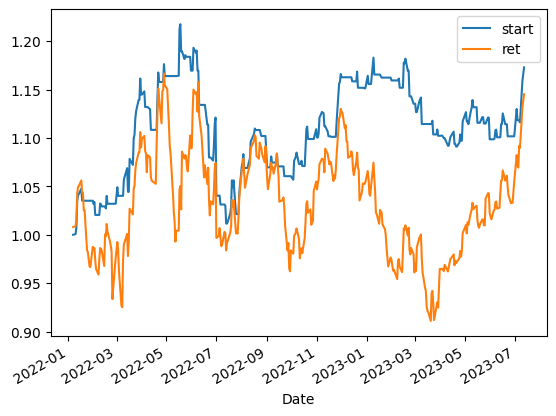

In [15]:
(df[['start','ret']] + 1).cumprod().plot()

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)
x_test

,Lag_1,Lag_2,Lag_3
Date,,,
2023-01-25,-0.005905,-0.005056,-0.011893
2023-01-27,-0.013825,-0.005905,-0.005056
2023-01-30,-0.018971,-0.013825,-0.005905
2023-01-31,0.009583,-0.018971,-0.013825
2023-02-01,-0.002500,0.009583,-0.018971
...,...,...,...
2023-07-05,-0.010303,0.025664,0.021551
2023-07-06,-0.001642,-0.010303,0.025664
2023-07-07,0.020991,-0.001642,-0.010303


In [17]:
y_train

Date
2022-01-07    1
2022-01-10    1
2022-01-11    1
2022-01-12    1
2022-01-13    1
             ..
2023-01-18    0
2023-01-19    0
2023-01-20    0
2023-01-23    0
2023-01-24    0
Name: direction, Length: 261, dtype: int64

In [18]:
y_test

Date
2023-01-25    0
2023-01-27    0
2023-01-30    1
2023-01-31    0
2023-02-01    0
             ..
2023-07-05    0
2023-07-06    1
2023-07-07    0
2023-07-10    1
2023-07-12    1
Name: direction, Length: 112, dtype: int64

In [19]:
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [29]:
x_test['ret'] = df.ret[x_test.index[0]:]
x_test['start'] = x_test['prediction_LR'] * x_test.ret
(x_test[['start','ret']] + 1).cumprod() - 1

,start,ret
Date,,
2023-01-25,0.000000,-0.013825
2023-01-27,0.000000,-0.032534
2023-01-30,0.000000,-0.023262
2023-01-31,0.000000,-0.025704
2023-02-01,-0.005927,-0.031478
...,...,...
2023-07-05,0.021491,0.069766
2023-07-06,0.021491,0.092220
2023-07-07,0.019497,0.090089


<Axes: xlabel='Date'>

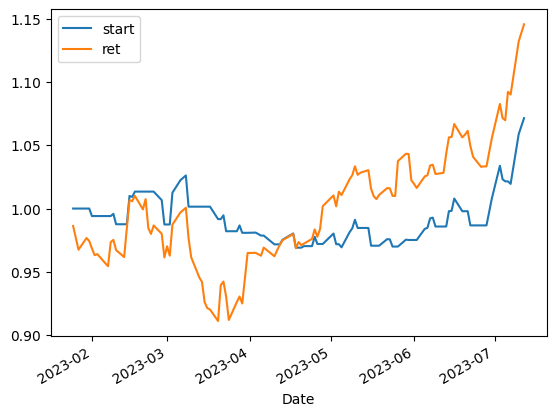

In [30]:
(x_test[['start','ret']] + 1).cumprod().plot()

In [ ]:
(x_test.tail(50))[['start,'ret']] + 1).cumprod()